In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad
from matplotlib.colors import ListedColormap



/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig2"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(25,25))


In [4]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata=sc.read_h5ad(PATH)
adata_5k=adata[adata.obs["tech"]=="xenium"].copy()
adata=adata[adata.obs["tech"]!="xenium"].copy()

#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')

import gc
gc.collect()


#adata=sc.read_h5ad(PATH2)
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

 


# adata_5k=sc.read_h5ad(PATH)
# # adata_5k.obs["Timepoint2"].value_counts()
# #adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata_5k.var_names]
#     return LIST




# adata_5k



In [6]:
adata_5k.obs["Annotation"]=adata_5k.obs["lvl5_annotation"]


In [7]:
adata_5k.obs["Annotation"].value_counts()

Annotation
KC3                 189820
KC1                 126090
F2: Universal       100872
Pericyte1            85232
VE3_Ven              69056
                     ...  
Neutrophil              17
KC_HF: HS               14
ILC_Prolif              12
ILC1_NCR2+P2RX7+         8
Mac_CX3CR1+              8
Name: count, Length: 100, dtype: int64

# Perineural mac

0 True
Baseline_never_CE3-SKI-28-FO-2-S22-C1 - Cell count:  1


/tmp/ipykernel_2903218/2825709689.py:19: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs["test"] = [x if x == CELL_TYPE or "Schwann" in x else "Other" for x in adata_i.obs["Annotation"]]
/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/software/cellgen/team298/ls34/NEMO2/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


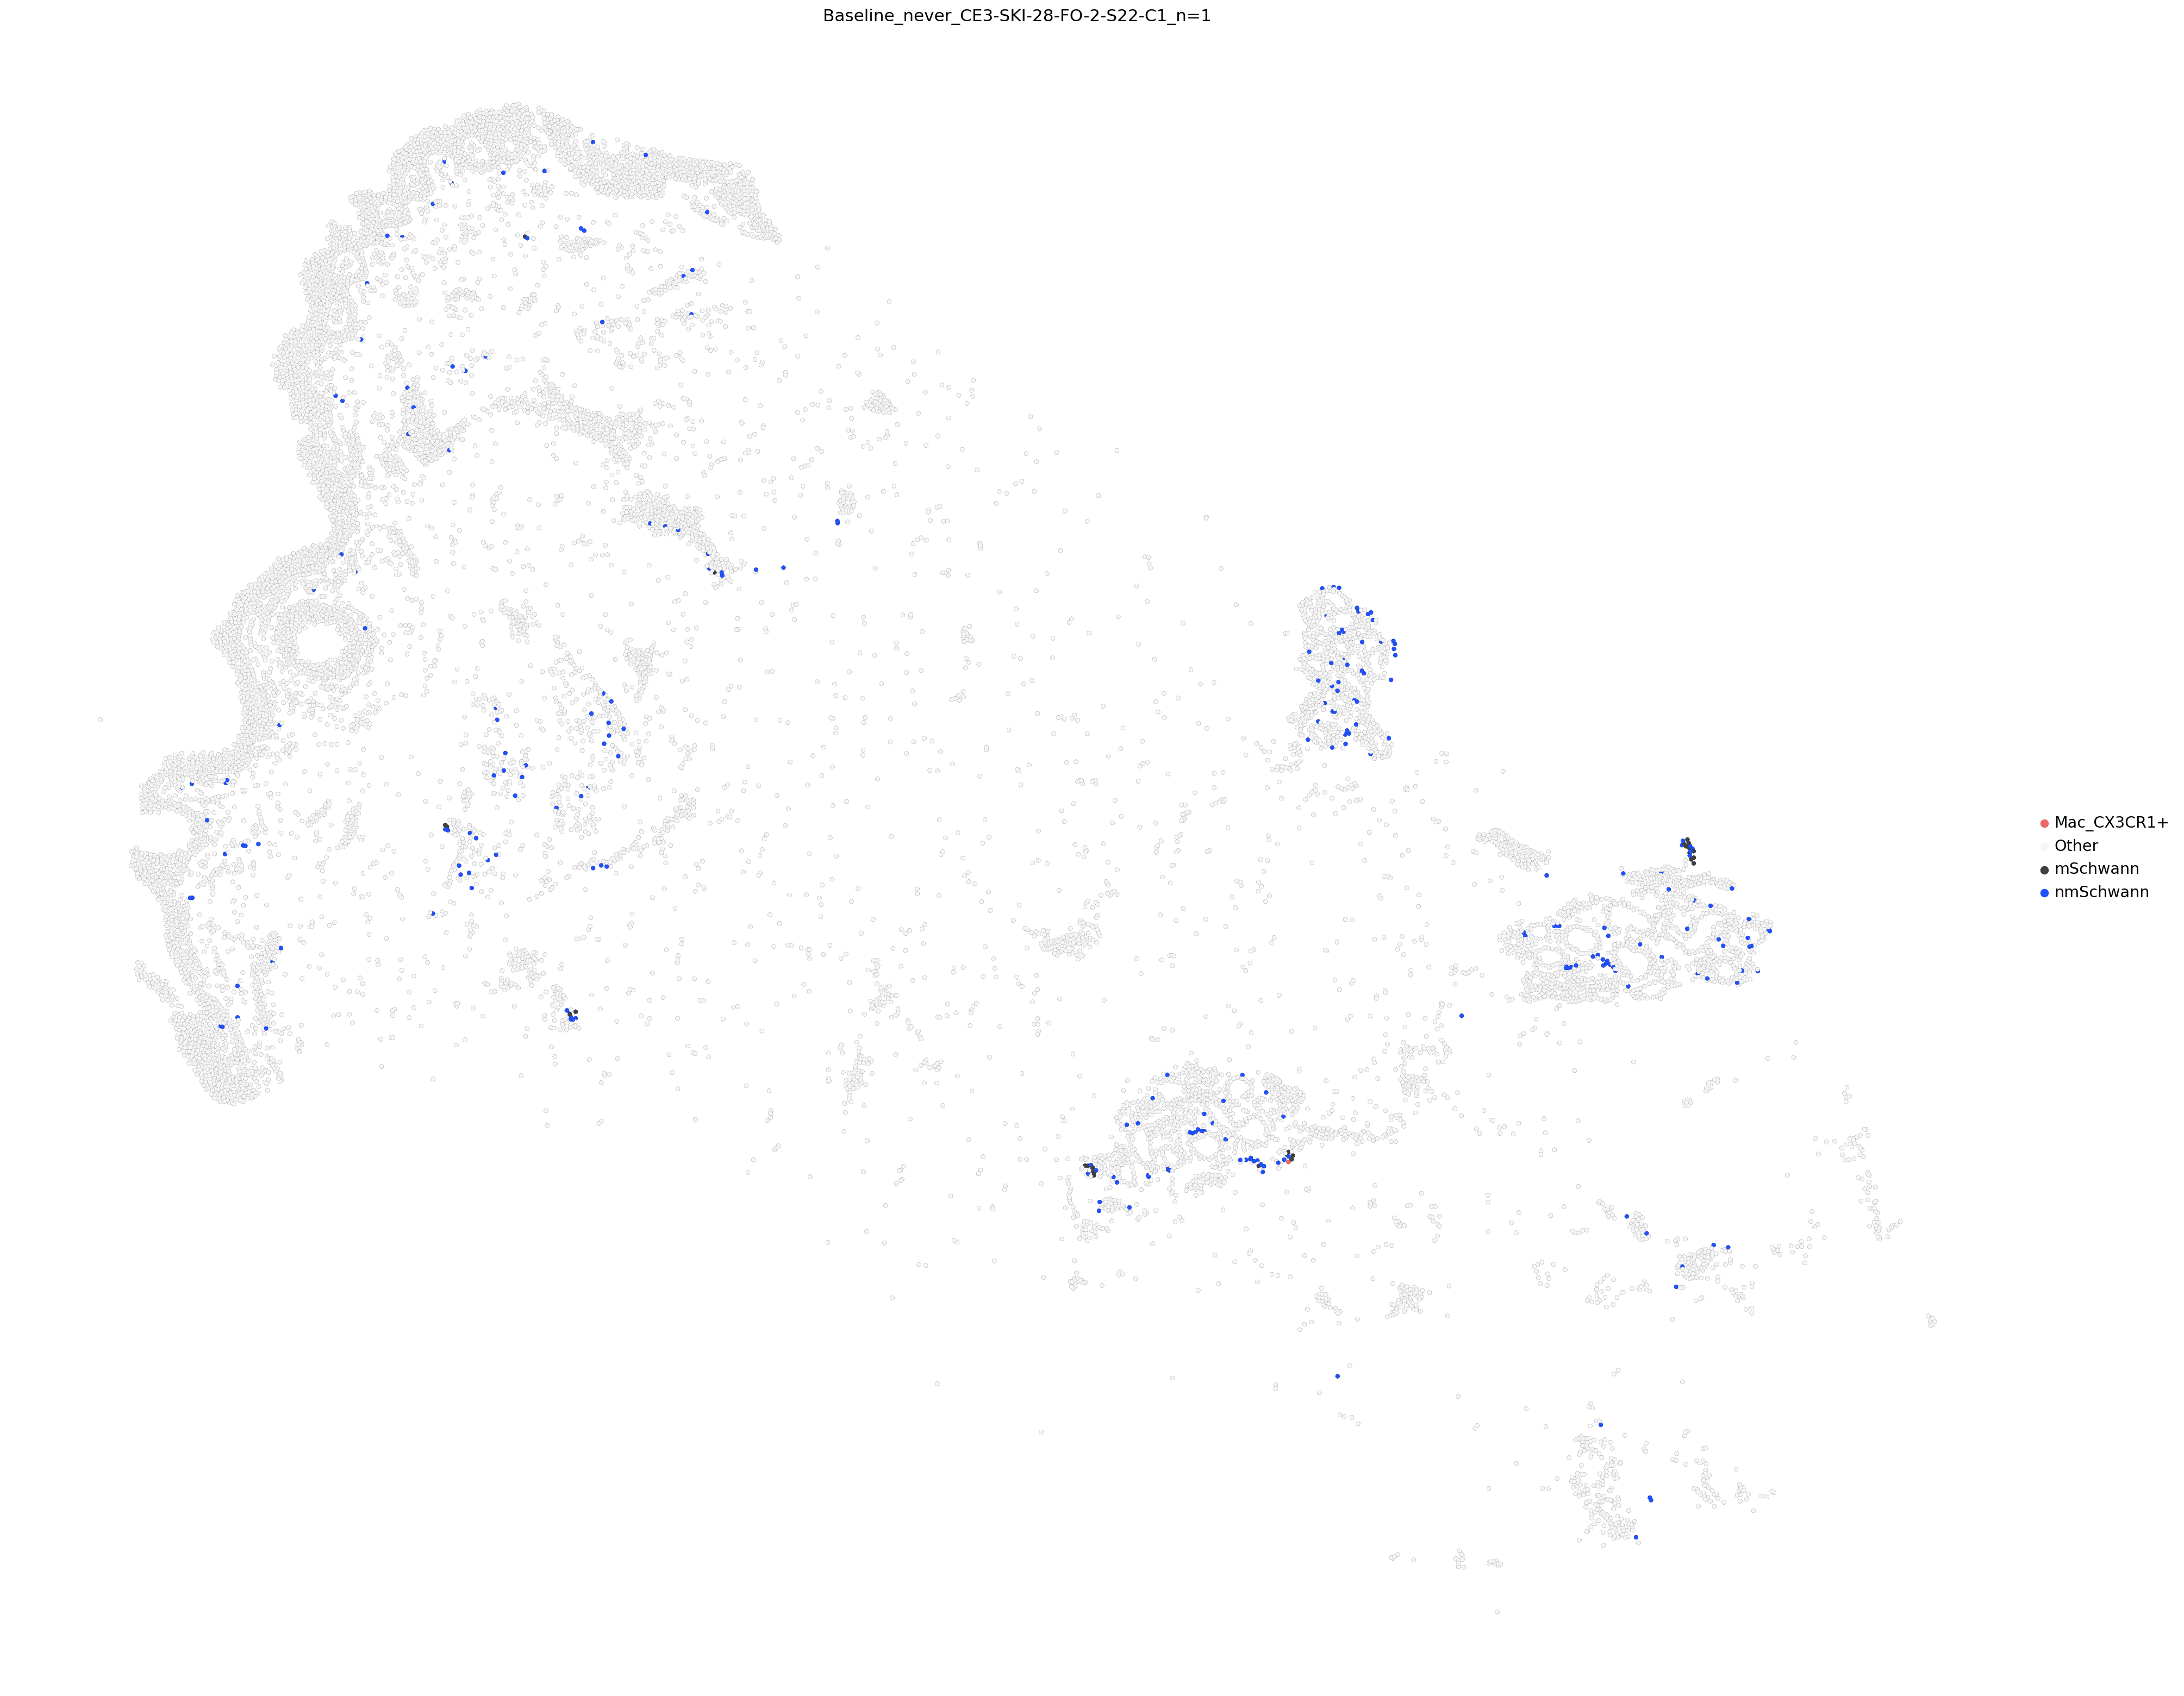

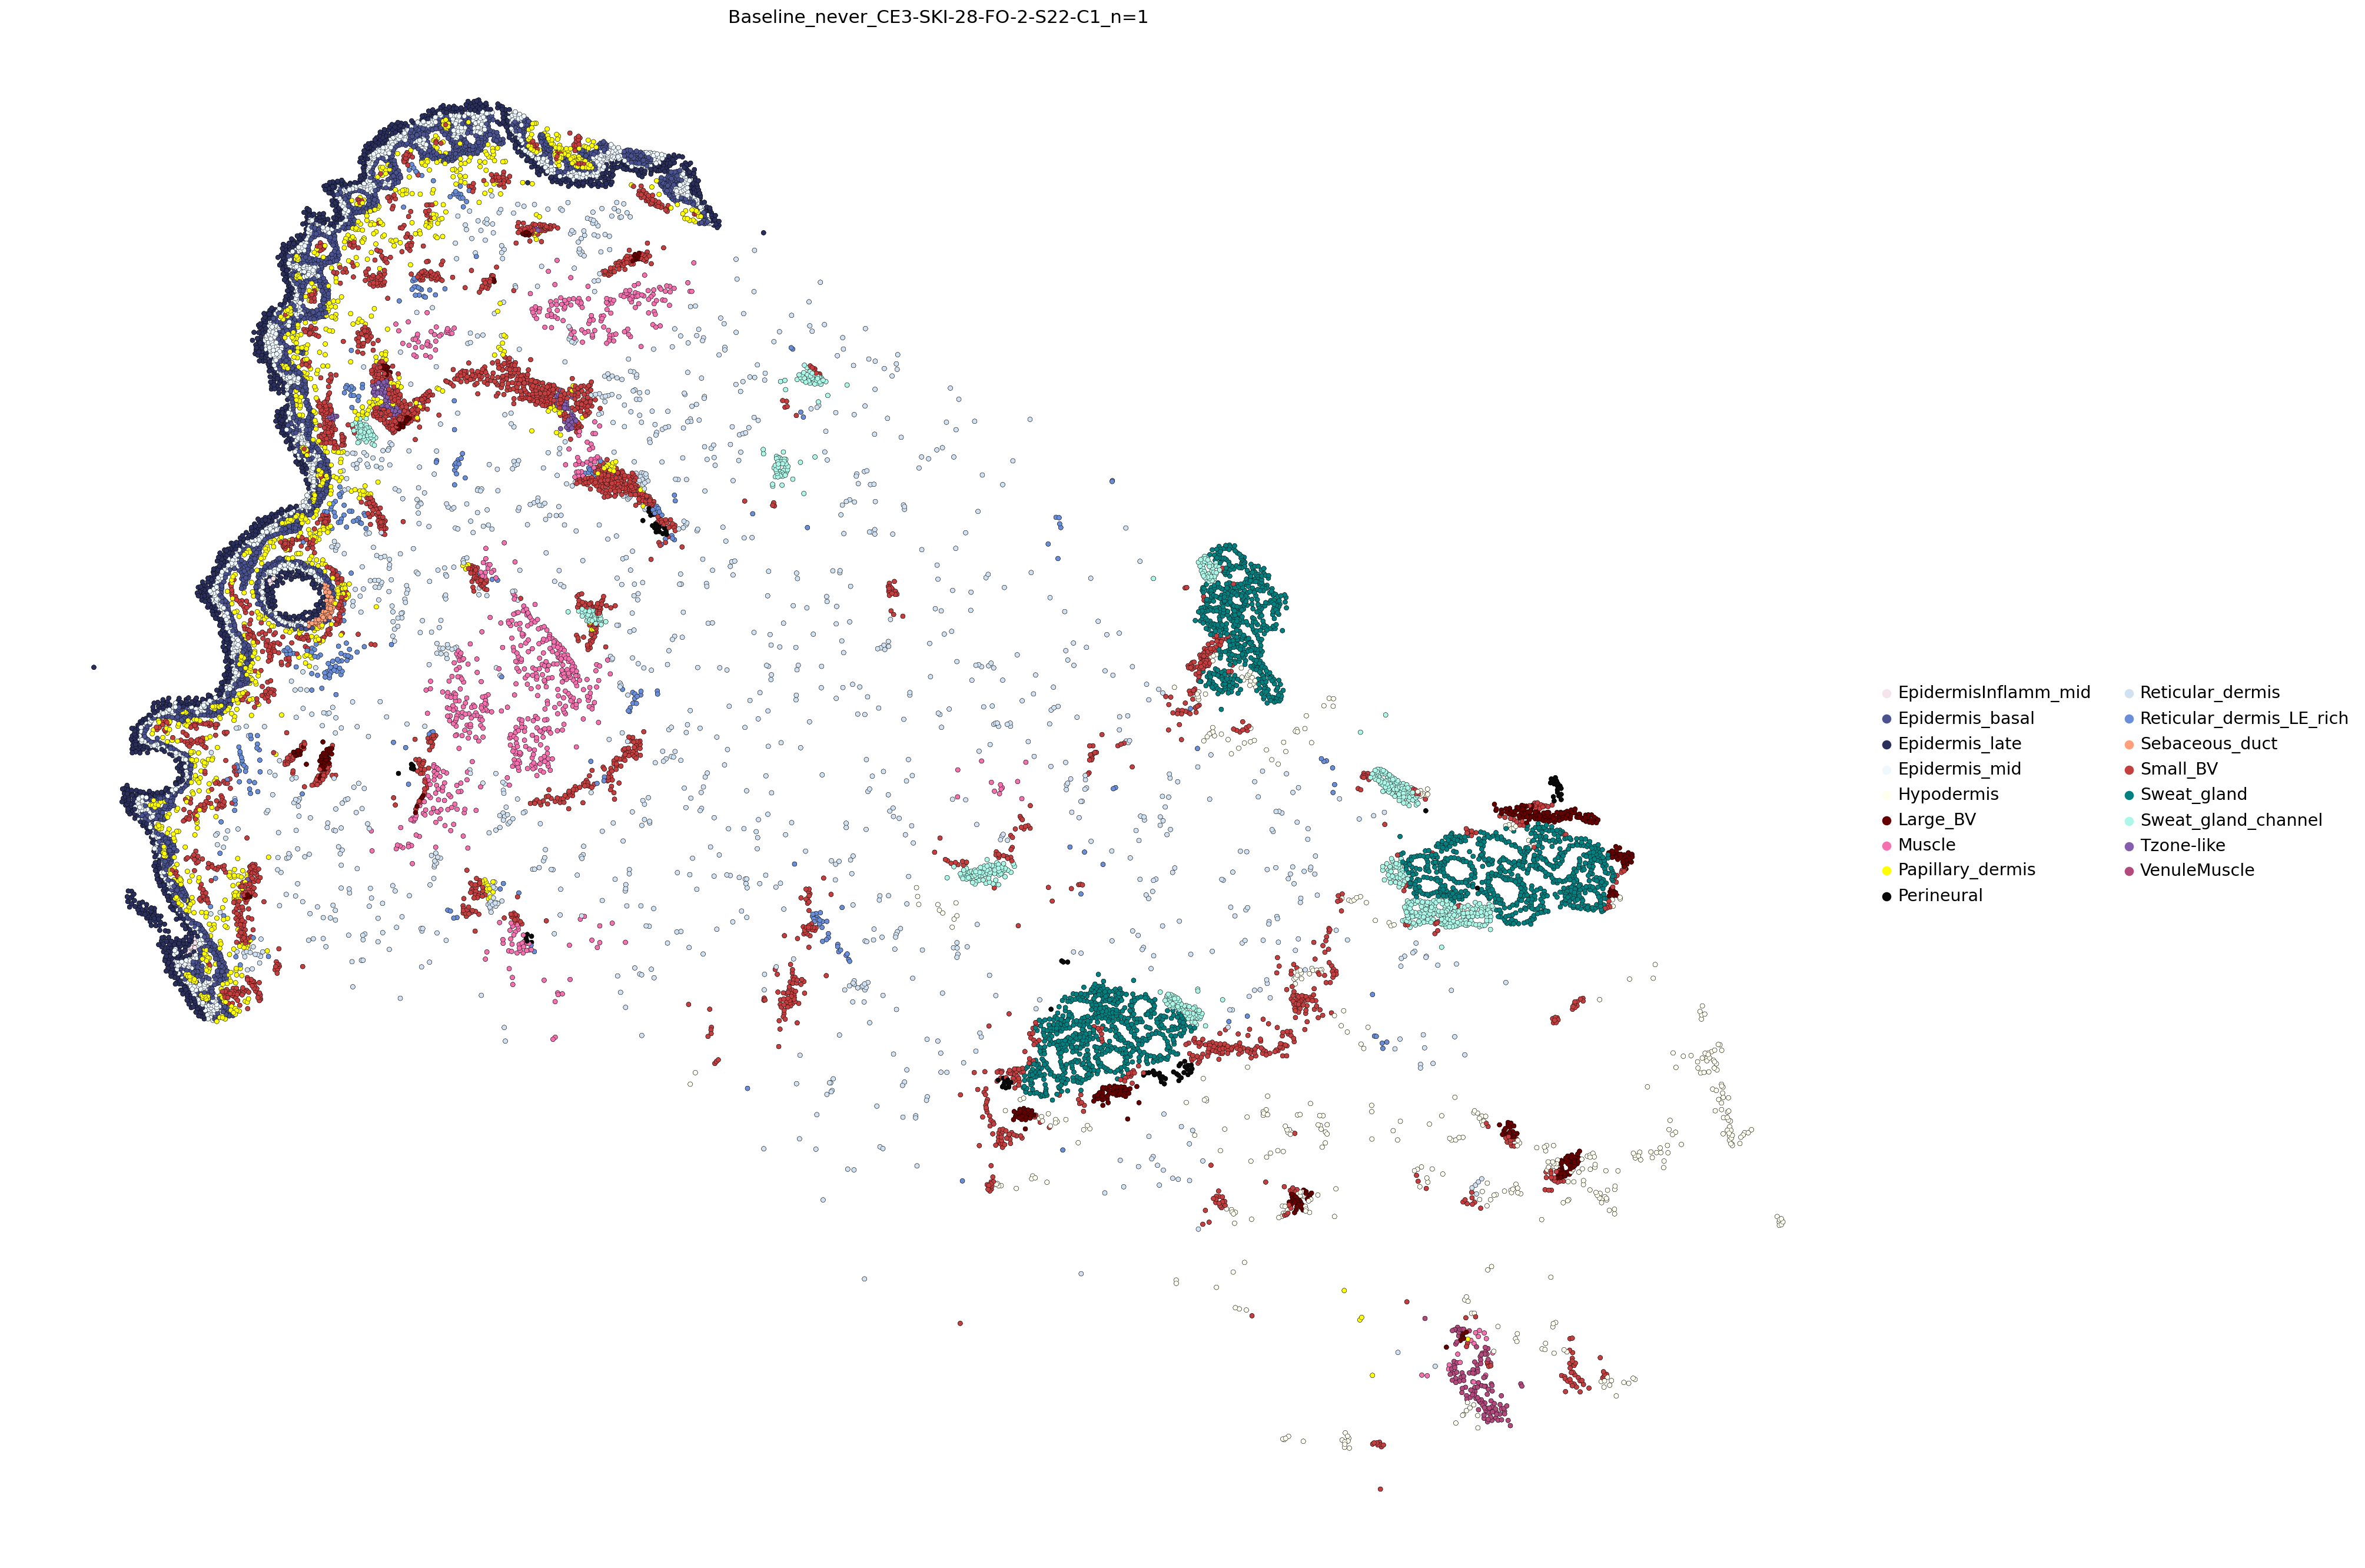

In [10]:
CELL_TYPE = 'Mac_CX3CR1+'
MIN_CELL_COUNT=1


i=0
#adata_5k=adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
for tissue_section_id in [ 'Baseline_never_CE3-SKI-28-FO-2-S22-C1']:
    adata_i =  adata_5k[adata_5k.obs["info_id6"]==tissue_section_id]
    niche_names_found = adata_i.obs["Annotation"].unique()
    STATUS =  adata_i.obs["info_id6"].unique()[0]
    print(i, CELL_TYPE in niche_names_found)
    if CELL_TYPE in niche_names_found:
        CELL_COUNT_IN_SECTION=adata_i[adata_i.obs["Annotation"]==CELL_TYPE].shape[0]
        print(tissue_section_id, "- Cell count: ", CELL_COUNT_IN_SECTION)

        if CELL_COUNT_IN_SECTION >= MIN_CELL_COUNT: 
            i=i+1
            adata_i.obs["test"] = [x if x == CELL_TYPE or "Schwann" in x else "Other" for x in adata_i.obs["Annotation"]]
            NUM = ord(CELL_TYPE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "#EC6A6A",  "#F6F6F6", '#404040', '#1F51FF'])
            else:
                custom_palette = ListedColormap([  "lightgrey", "#EC6A6A", 'yellow', 'orange'])
            #print(x)
            if tissue_section_id =="Baseline_never_CE3-SKI-28-FO-2-S22-C1":
                # sq.pl.spatial_scatter(
                #         adata_i,
                #         library_id="spatial",
                #         shape=None,
                #         color="test",
                #         size=40,
                #         vmax=1,
                #         title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                #         palette=custom_palette,
                #         save="perineural_mac_umap.pdf",
                #       edgecolor='black',
                #         linewidth=0.3,
                #         #ax=ax,
                #         #legend_loc="on data"  # Disable the legend for each subplot
                #     )
                sq.pl.spatial_scatter(
                        adata_i,
                        library_id="spatial",
                        shape=None,
                        color="test",
                        size=50,
                        vmax=1,
                        title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                        palette=custom_palette,
                        save="perineural_mac_umap_biggerdots.pdf",
                        edgecolor='black',
                        linewidth=0.05,
                        #ax=ax,
                        #legend_loc="on data"  # Disable the legend for each subplot
                    )
                sq.pl.spatial_scatter(
                        adata_i,
                        library_id="spatial",
                        shape=None,
                        color="niche19",
                        size=50,
                        vmax=1,
                        title=STATUS + "_n=" + str(CELL_COUNT_IN_SECTION),
                        #palette=custom_palette,
                        save="perineural_mac_umap_NCIHE.pdf",
                      edgecolor='black',
                        linewidth=0.2 ,
                        #ax=ax,
                        #legend_loc="on data"  # Disable the legend for each subplot
                    )
            else:
                1

                                    #ax=ax,
                                    #legend_loc="on data"  # Disable the legend for each subplot
 
        else:
             print(STATUS, " - does not contain ", CELL_TYPE, ". Count is " , CELL_COUNT_IN_SECTION,)# " - i=", i)

# Mac dotplot

In [ ]:
CATEGORY="lvl5_annotation"

In [ ]:
mac_markers={ #'Monocyte': ['CD14', 'VCAN', 'S100A8', 'S100A9', 
              #'S100A12', "FCN1",'MEFV'], #"FCGR3A"
 #'Monocyte1': ['SERPINB2', 'MTF1', 'PTGER2'],
 #'Monocyte2': ['aaFCGR1A', 'SYT1', 'ASGR1', 'PRAM1', 'CCR2'],
# 'Mono_KC': ['KRT16', 'EGFR'],
 'Macrophage': ['C1QA', 'C1QC',  'CD163', 'CCL4', "STAB1",'MARCO', ],
      'Macro1': ['SLAMF9', 'TNFRSF6B',#"CXCL5", #"IL24"
                # "CCL24"
                ],

 'Macro2': ['MRC1','F13A1', "LYVE1","IGF1", "CCL13", 'CCL14', "CD209"],
 #'T': ['CD3E', 'CD96', 'TRBC1'],
 #'Macro_NEU4/LRRC32': ['CCL4L2', 'CCRL2', 'ACHE', 'NEU4', 'IL23A', 'CD40'],
# 'TREM2+ADAMDEC1+': ['TREM2', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
 'CX3CR1+MAC': ['TREM2', 'SPP1',  "LPL", 'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                'FCGR3A', 
                'TGFBR1', 'PRKCH', 'CD93', 'HTRA1', "ADRB1",
                'GDF11', 'OLR1', 'ITGB3'
               ],
             # 'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR', "SELL",
             #                 "TNFSF4", "TCF4"],

#  'cDC1': ['CLEC9A', 'XCR1', "ENPP1", "PPY", "BTLA", "TLR3"],
#              "Mature cDC1": ["ITGAE", "CD8A"],
#  'cDC2': ['CLEC10A', 'CD1B', 'CD1C', "CD163", 'CD1E', # 'CD5', 
#           #'SPIB', 'TNFSF4', 'TSPAN2'
#          ],

#              'cDC2B_subtype_MMP12': ['MMP12', "CST6", "GGT5", "CARD9",  "ALOX15", "CXCL9",#'CROCC',
#                    ],
#               'cDC2B_subtype_EREG+': ["ITGAV","LAMB3", 
#  "EREG",'IL1B', #'CROCC',
#                                        #"SATB1",
#                                      # "EHD1", "LUCAT1", "ITGAV", "OLR1", "TNFRSF4", "DOT1L", "DOCK4",
#           #    "ADA", "MMP19", "ELK1", "LAMB3", "MIR3142HG", "GPR35",   "ISG20", "CXCL3", "MMP9",  
#                    ],
#               'Migrating': ['CCR7', 'LAMP3',  ], 
#              # 'MoDC': ["PLK2", "KLF2", "THBS1"
#              #     #'THBS1',  'C1QTNF1', "INHBA", "TNFRSF4"
#              # ],

#  'LC': ['CD207','FCGBP', "EPCAM", 'CD1A', "SLC18A2", "TMEM45A", "IL22RA2","NMU" #"CLEC4A"
#        ],

#  'MigDC': ['LY75', "CD200",  "BATF3",'SLCO5A1', 'WNT5B', 'ADAM12', "ACHE",
#            "CD274", "PDCD1LG2",  "TNFSF4", "PVR", "RAMP1" , "EBI3","ICOSLG",
#           "TREML1", "CD80", ],  #'ST8SIA1', 'CCL19', "CCL17", "CCL22",
         
#      #"TFPI", "SERINC2", #"IL10",
#           #'LILRA1', 'LILRA2'
#              "MigDC(cDC2)": ["ANXA3"],
#              "T_survival/attracting": ["IL12B", "IL15",  "CCL22", "CCL17", ],
#  'pDC': ['CLEC4C',  #'IL3RA', 'TNFRSF21', 
         
#          'LILRA4', 'PTCRA', 'IGKJ5', 'LAMP5', "P2RY6",# "ITGAE", 
#          "PTGDS"],
# "pDC_extra": ['LAMP5', 'TLR9',  'SMIM5', 'IGKJ5', 'EPDR1',],
#  'Neutrophil': [#'CXCL8',
#      'FCGR3B', "CXCR2", "PROK2", "OSM",  #KCNJ15, ADGRG3
#         "AQP9",
#     "KCNJ15",
 
#     #"CXCL12",
#     #"LILRB4",
#     #"SLIT3",
#     "CSF3R",
#     #"TNFSF13B",
#    # "TNFSF10",
#     "PADI4",
#                 # "MPO"
#                ], 
                      #(adata.obs[CATEGORY]== "Neutrophil")]
    #           "Mast cell": [#"HPGDS", "KIT", "HPGD",
    #                 "HDC", #"GATA2",   
    #                 "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
    #                           "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
    #             ],
    #         "Eosinophils": [ "CLC", "CCR3",#"CCL23",    #"PTGDR2", "P2RY1", 
    #                         "S100P",
    #                          "IL4",
    # "IL13",
    # "ETS1",
    # "KLF5",
    # "NTRK1",
    # "KCNJ2",
    # "IPO11",
    # "CYP11A1",
    # "TNFSF11",
    # "OSM"
    #                        ],
    #         #"OTHER": ["SECISBP2L"],
    #          "cycling": ["TOP2A", "MKI67"]
            }

# adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
# adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()

# sc.pl.dotplot(adata_i, 
#               remove_markers(mac_markers),
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 standard_scale="var")
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(mac_markers),
#               groupby=CATEGORY,
#               dendrogram=False, 
              
#                 standard_scale="var", 
#               dot_max=0.3,)

# sc.pl.dotplot(adata_i, 
#               mac_markers,
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 standard_scale="var")

In [ ]:
mac_markers=  ['TREM2', 'SPP1',  "LPL", 'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                'FCGR3A', 
                'TGFBR1', 'PRKCH', 'CD93', 'HTRA1', "ADRB1",
                'GDF11', 'OLR1', 'ITGB3'
               ]
          
 

In [ ]:
adata_ii=adata_5k[ (adata_5k.obs[CATEGORY].str.startswith("Mac"))
                 ]
sc.pp.normalize_total(adata_ii, target_sum=1e4)
sc.pp.log1p(adata_ii)
# #adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# # for x in adata_5k_ii.obs["disease_overall"].unique():
# #     print(x)
# #     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#          "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                             "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A",

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#          ]
#               }
# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# TREG_GENES = {
#     'Treg': ['FOXP3', 'TIGIT', "IL2RA", 'CTLA4'],
#     "Activated_Treg": ["LRRC32", "IL1R1", "CCR8", "ITGAV"],
#     "TR1": ["LAG3", "IL10", "MIR155HG", "HAVCR2"],
# }

#flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# Create dotplot
dp = sc.pl.DotPlot(
    adata_ii,
   remove_markers(mac_markers),
    groupby="lvl5_annotation",
    vmax=0.8,
  #  categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)

# Style it
dp = dp.style(
    cmap='Reds',
    color_on='square',
    dot_edge_color='white',
    dot_edge_lw=1,
    grid=False,
    dot_max=0.6
)

# Save BEFORE showing
dp.savefig("fig2/perineuralmac_dotplot_xenium.pdf", dpi=300)

# Optionally display
#dp.show()
 

In [ ]:
adata_ii=adata[#(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
                (adata.obs[CATEGORY].str.startswith("Mac"))
                 ]
sc.pp.normalize_total(adata_ii, target_sum=1e4)
sc.pp.log1p(adata_ii)
# # #adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# # for x in adata_5k_ii.obs["disease_overall"].unique():
# #     print(x)
# #     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#          "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                             "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A",

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#          ]
#               }
# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# TREG_GENES = {
#     'Treg': ['FOXP3', 'TIGIT', "IL2RA", 'CTLA4'],
#     "Activated_Treg": ["LRRC32", "IL1R1", "CCR8", "ITGAV"],
#     "TR1": ["LAG3", "IL10", "MIR155HG", "HAVCR2"],
# }

#flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# Create dotplot
dp = sc.pl.DotPlot(
    adata_ii,
   remove_markers(mac_markers),
    groupby="lvl5_annotation",
    vmax=0.8,
  #  categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)

# Style it
dp = dp.style(
    cmap='Reds',
    color_on='square',
    dot_edge_color='white',
    dot_edge_lw=1,
    grid=False,
    dot_max=0.6
)

# Save BEFORE showing
dp.savefig("fig2/perineuralmac_dotplot_scrna.pdf", dpi=300)

# Optionally display
#dp.show()
 

In [ ]:
adata_ii=adata[#(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
                (adata.obs[CATEGORY].str.startswith("Mac"))
                 ]
sc.pp.normalize_total(adata_ii, target_sum=1e4)
sc.pp.log1p(adata_ii)
# # #adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# # for x in adata_5k_ii.obs["disease_overall"].unique():
# #     print(x)
# #     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#          "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                             "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A",

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#          ]
#               }
# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# TREG_GENES = {
#     'Treg': ['FOXP3', 'TIGIT', "IL2RA", 'CTLA4'],
#     "Activated_Treg": ["LRRC32", "IL1R1", "CCR8", "ITGAV"],
#     "TR1": ["LAG3", "IL10", "MIR155HG", "HAVCR2"],
# }

#flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# Create dotplot
dp = sc.pl.DotPlot(
    adata_ii,
   remove_markers(mac_markers),
    groupby="lvl5_annotation",
    vmax=0.8,
  #  categories_order=["Treg", "Treg_LRRC32+", "TR1"]
)

# Style it
dp = dp.style(
    cmap='Reds',
    color_on='square',
    dot_edge_color='white',
    dot_edge_lw=1,
    grid=False,
    dot_max=0.6
)

# Save BEFORE showing
dp.savefig("fig2/perineuralmac_dotplot_scrna.pdf", dpi=300)

# Optionally display
#dp.show()
 

In [ ]:
adata_ii.shape

In [ ]:
stop